In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

## Define a function that performs the double difference test

def drop_diff_double(input_array, threshold=2000):
    #copy input
    start_array = input_array.copy()
    #sanitize input array by replacing nan values with median values
    start_array[np.isnan(start_array)] = np.nanmedian(start_array)
    diff = np.diff(start_array)
    drop_list = []
    
    for i in range(len(diff)-1):
        if ((diff[i] < -threshold and diff[i+1] > threshold)
            or (diff[i] > threshold and diff[i+1] < -threshold)):
            drop_list.append(i+1)
    
    output_array = input_array.copy()
    output_array[drop_list] = np.nan
    
    return output_array, len(drop_list)

def drop_diff_single(input_array, threshold=2000):
    #copy input
    start_array = input_array.copy()
    #sanitize input array by replacing nan values with median values
    start_array[np.isnan(start_array)] = np.nanmedian(start_array)
    diff = np.diff(start_array)
    drop_list = []
    
    for i in range(len(diff)-1):
        if np.abs(diff[i]) > threshold:
            drop_list.append(i+1)
    
    output_array = input_array.copy()
    output_array[drop_list] = np.nan
    
    return output_array, len(drop_list)

def drop_freq_bin(input_array, bin_len = 1000, std = 3):
    start_array = input_array.copy()
    num_bin = test.size/bin_len

    for i in range(num_bin):

        center = np.nanmedian(start_array[i*bin_len:(i+1)*bin_len])
        width = np.nanstd(start_array[i*bin_len:(i+1)*bin_len])

        drop = np.abs(start_array[i*bin_len:(i+1)*bin_len] - center) > std*width
        start_array[i*bin_len:(i+1)*bin_len][drop] = np.nan

    center = np.nanmedian(start_array[num_bin*bin_len:])
    width = np.nanstd(start_array[num_bin*bin_len:])

    drop = np.abs(start_array[num_bin*bin_len:] - center) > std*width
    start_array[num_bin*bin_len:][drop] = np.nan
    
    drops = np.sum(np.isnan(start_array)) - np.sum(np.isnan(input_array))
    
    return start_array, drops

Welcome to JupyROOT 6.12/04


In [6]:
run_range = range(4141,4179)
prefix = 'data1/newg2/DataProduction/Offline/ArtTFSDir/v9_21_05_dev/FieldPlainRootOutput_'

fp_run = gm2.FixedProbe(run_range, prefix=prefix)

Reading event 155350/155359 99.99%                                 
loop done: 100%                                    


In [7]:
fp_time = fp_run.time[1:]/1.e9
fp_freq = fp_run.freq[1:]
fp_qual = fp_run.qtag[1:]

/home/aetb/.local/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in greater


/home/aetb/.local/lib/python2.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in greater


CPU times: user 3.07 s, sys: 649 ms, total: 3.72 s
Wall time: 2.91 s


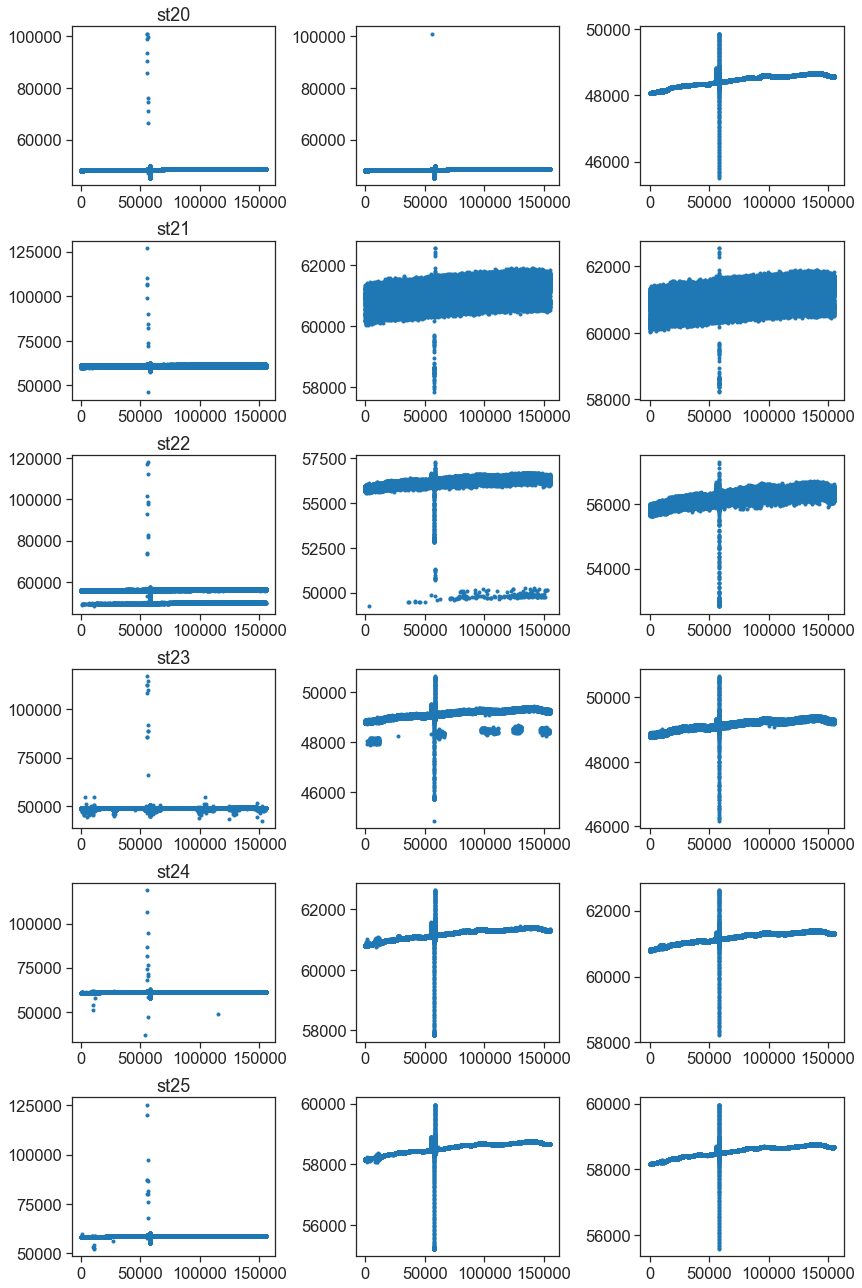

In [13]:
%%time

fig, axs = plt.subplots(6,3)

for st in range(20,26):
    print 'st'+str(st)+'\r',
    test = fp_freq[:,st]

    dropped_1, _ = drop_diff_single(test, threshold=200)
    # dropped_1, _ = drop_diff_single(dropped_1, threshold=1000)
    dropped_2, _ = drop_freq_bin(dropped_1, bin_len=1000, std=3)
    # dropped_2, _ = drop_freq_bin(test, bin_len=1000, std=5)

    axs[st-20, 0].plot(test,'.')
    axs[st-20, 0].set_title('st'+str(st))
    axs[st-20, 1].plot(dropped_1, '.')
    axs[st-20, 2].plot(dropped_2, '.')

fig.set_size_inches(12,18)
fig.tight_layout()

In [ ]:
plt.plot(np.diff(dropped_1), '.')

In [ ]:
st = 22
# new, drops = drop_diff_double(fp_freq[:,st])
new, drops = drop_diff_single(fp_freq[:,st])

print 'st' + str(st) + ': ' + str(drops)

plt.plot(new,'.')

In [ ]:
test = fp_freq[:,22]

dropped_1, _ = drop_diff_double(test, threshold=1000)
dropped_2, _ = drop_diff_single(test, threshold=1000)

fig, axs = plt.subplots(3,1)
axs[0].plot(test,'.')
axs[1].plot(dropped_1, '.')
axs[2].plot(dropped_2, '.')

fig.set_size_inches(8,9)
fig.tight_layout()

In [ ]:
filled_2 = dropped_2.copy()
filled_2[np.isnan(filled_2)] = np.nanmedian(filled_2)

dropped_2b, _ = drop_diff_single(filled_2)

fig, axs = plt.subplots(3,1)
axs[0].plot(dropped_2, '.')
axs[1].plot(filled_2, '.')
axs[2].plot(dropped_2b, '.')

fig.set_size_inches(8,9)
fig.tight_layout()

In [ ]:
%%time

test = fp_freq[:,22]
diff = np.diff(test)

drop_list = []

for i in range(len(diff)-1):
    if diff[i] < 2000:
        if diff[i+1] > 2000:
            drop_list.append(i+1)
    elif np.abs(diff[i]) > 2000:
        if diff[i+1] < 2000:
            drop_list.append(i+1)
            
test_dropped = test.copy()

test_dropped[drop_list] = np.nan

test_filled = test_dropped.copy()
test_filled[np.isnan(test_filled)] = np.nanmedian(test_filled)


diff_2 = np.diff(test_filled)
drop_list_2 = []

for i in range(len(diff_2)-1):
    if diff_2[i] < 2000:
        if diff_2[i+1] > 2000:
            drop_list_2.append(i+1)
    elif np.abs(diff_2[i]) > 2000:
        if diff_2[i+1] < 2000:
            drop_list_2.append(i+1)
            
test_dropped_2 = test_dropped.copy()
test_dropped_2[drop_list_2] = np.nan

test_filled_2 = test_dropped_2.copy()
test_filled_2[np.isnan(test_filled_2)] = np.nanmedian(test_filled_2)

diff_3 = np.diff(test_filled_2)
drop_list_3 = []

threshold = 5*np.std(diff_3)

for i in range(len(diff_3)-1):
    if np.abs(diff_3[i]) > threshold:
        drop_list_3.append(i+1)
        
test_dropped_3 = test_dropped_2.copy()
test_dropped_3[drop_list_3] = np.nan

In [ ]:
fig, axs = plt.subplots(4,1)
axs[0].plot(test,'.')
axs[1].plot(test_dropped, '.')
axs[2].plot(test_dropped_2, '.')
axs[3].plot(test_dropped_3, '.')
fig.set_size_inches(8,12)
fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(3,1)
axs[0].plot(diff,'.')
axs[1].plot(diff_2, '.')
axs[2].plot(diff_3, '.')
fig.set_size_inches(8,9)
fig.tight_layout()

In [ ]:
plt.plot(test_dropped_2, '.')

In [ ]:
diff_2 = np.diff(test_dropped)

drop_list_2 = []

for i in range(len(diff_2)-1):
    if np.abs(diff_2[i]) > 2000:
#         drop_list_2.append(i)
        drop_list_2.append(i+1)
            
test_dropped_2 = test_dropped.copy()

# test_dropped_2[drop_list_2] = np.nan


In [ ]:
# plt.plot(test_dropped, '.')
plt.plot(test_dropped_2,'.')

In [ ]:
plt.plot(diff,'.')

In [ ]:
plt.plot(test_dropped, '.')

In [ ]:
np.abs(test_dropped_2 - center) > 2000

In [ ]:
plt.plot(test_dropped_2)

In [ ]:
print np.sum(np.isnan(test))
print np.sum(np.isnan(test_dropped))
print np.sum(np.isnan(test_dropped_2))